<a href="https://colab.research.google.com/github/Santapaji/Facial-Emotion-Expressions/blob/main/Facial_expression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Before running the notebook make  sure to upload the dataset(zipped) from this link https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions**


**ignore the error statement in model 1 compilation**

# **MODEL-1**

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
448/448 [==============================] - ETA: 0s - loss: 1.7727 - accuracy: 0.2829

448/448 [==============================] - 332s 736ms/step - loss: 1.7727 - accuracy: 0.2829 - val_loss: 1.5931 - val_accuracy: 0.3974
Epoch 2/10
448/448 [==============================] - 306s 684ms/step - loss: 1.6250 - accuracy: 0.3613
Epoch 3/10
448/448 [==============================] - 292s 652ms/step - loss: 1.5518 - accuracy: 0.3950
Epoch 4/10
448/448 [==============================] - 292s 651ms/step - loss: 1.5079 - accuracy: 0.4115
Epoch 5/10
448/448 [==============================] - 292s 651ms/step - loss: 1.4779 - accuracy: 0.4261
Epoch 6/10
448/448 [==============================] - 295s 657ms/step - loss: 1.4478 - accuracy: 0.4393
Epoch 7/10
448/448 [==============================] - 291s 651ms/step - loss: 1.4294 - accuracy: 0.4480
Epoch 8/10
448/448 [==============================] - 297s 664ms/step - loss: 1.4073 - accuracy: 0.4557
Epoch 9/10
448/448 [==============================] - 292s 652ms/step - loss: 1.3948 - accuracy: 0.4606
Epoch 10/10
448/448 [============

ValueError: ignored

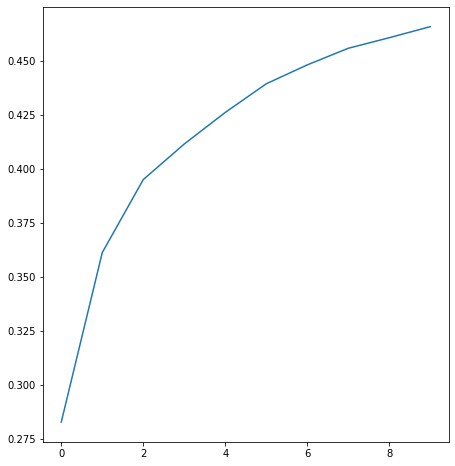

In [ ]:
import zipfile
import numpy as np
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

#Load the zipped dataset
with zipfile.ZipFile('/content/sample_data/archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Define the parameters
img_width, img_height = 48, 48
train_data_dir = 'images/train'
validation_data_dir = 'images/validation'
nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10
batch_size = 64
num_classes = 7

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# Save the model
model.save('facial_expression_model.h5')



ValueError: ignored

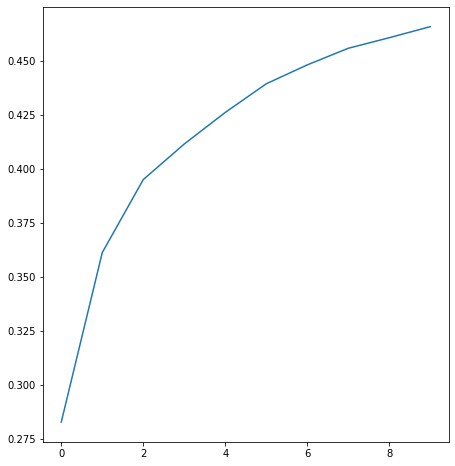

In [12]:
# Plot the accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **MODEL-2**

In [4]:
import zipfile
import numpy as np
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Load the zipped dataset
#with zipfile.ZipFile('/content/sample_data/archive.zip', 'r') as zip_ref:
    #zip_ref.extractall()

# Define the parameters
img_width, img_height = 48, 48
train_data_dir = 'images/train'
validation_data_dir = 'images/validation'
nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10
batch_size_t = 16
batch_size_v = 4
num_classes = 7

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)#, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_t,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_v,
    color_mode="grayscale",
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size/2,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size/2)

# Save the model
model.save('facial_expression_model2.h5')



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 201s 223ms/step - loss: 1.7091 - accuracy: 0.3108 - val_loss: 1.6150 - val_accuracy: 0.3884
Epoch 2/10
897/897 [==============================] - 197s 219ms/step - loss: 1.5347 - accuracy: 0.3994 - val_loss: 1.4792 - val_accuracy: 0.4487
Epoch 3/10
897/897 [==============================] - 199s 221ms/step - loss: 1.4541 - accuracy: 0.4339 - val_loss: 1.4131 - val_accuracy: 0.4777
Epoch 4/10
897/897 [==============================] - 201s 224ms/step - loss: 1.3955 - accuracy: 0.4571 - val_loss: 1.3133 - val_accuracy: 0.5167
Epoch 5/10
897/897 [==============================] - 208s 232ms/step - loss: 1.3338 - accuracy: 0.4811 - val_loss: 1.3151 - val_accuracy: 0.5089
Epoch 6/10
897/897 [==============================] - 213s 237ms/step - loss: 1.2748 - accuracy: 0.5122 - val_loss: 1.3442 - val_accuracy: 0.4866
Epoch 7/10
897/897 [===================

# **PLOTTING MODEL 2**

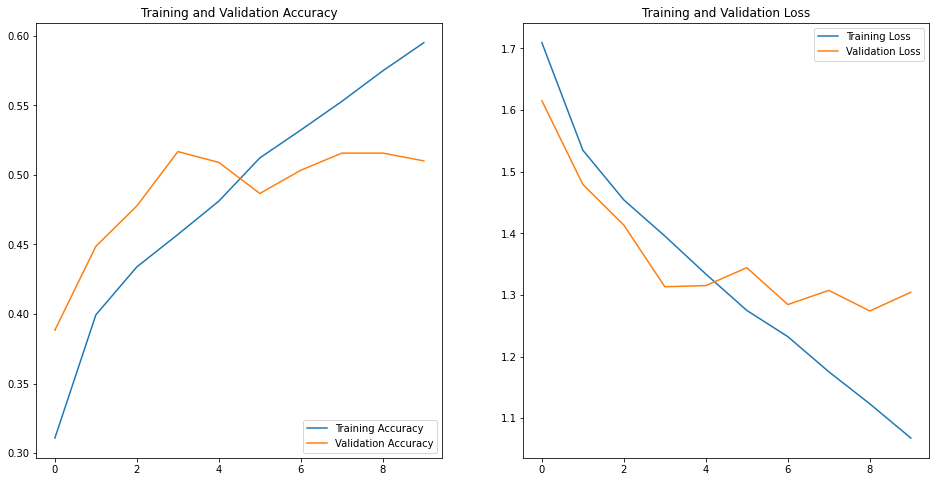

In [6]:
# Plot the accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **MODEL-3**

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 79s 87ms/step - loss: 1.7302 - accuracy: 0.2992 - val_loss: 1.5253 - val_accuracy: 0.4386
Epoch 2/10
897/897 [==============================] - 77s 86ms/step - loss: 1.4675 - accuracy: 0.4312 - val_loss: 1.4125 - val_accuracy: 0.4643
Epoch 3/10
897/897 [==============================] - 78s 87ms/step - loss: 1.3565 - accuracy: 0.4813 - val_loss: 1.3548 - val_accuracy: 0.4710
Epoch 4/10
897/897 [==============================] - 78s 87ms/step - loss: 1.2910 - accuracy: 0.5079 - val_loss: 1.2724 - val_accuracy: 0.5089
Epoch 5/10
897/897 [==============================] - 77s 86ms/step - loss: 1.2278 - accuracy: 0.5330 - val_loss: 1.2819 - val_accuracy: 0.5145
Epoch 6/10
897/897 [==============================] - 78s 86ms/step - loss: 1.1782 - accuracy: 0.5532 - val_loss: 1.2569 - val_accuracy: 0.5357
Epoch 7/10
897/897 [==============================]

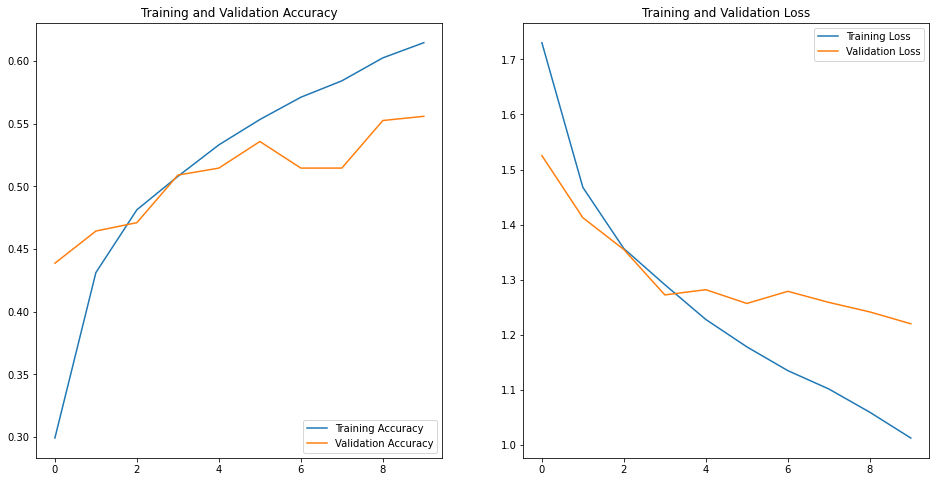

In [8]:
import zipfile
import numpy as np
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Load the zipped dataset
#with zipfile.ZipFile('/content/sample_data/archive.zip', 'r') as zip_ref:
    #zip_ref.extractall()

# Define the parameters
img_width, img_height = 48, 48
train_data_dir = 'images/train'
validation_data_dir = 'images/validation'
nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10
batch_size_t = 16
batch_size_v = 4
num_classes = 7

# Define the model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(7, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)#, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_t,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_v,
    color_mode="grayscale",
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size/2,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size/2)

# Save the model
model.save('facial_expression_model3.h5')

# Plot the accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# **MODEL-4**

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 197s 218ms/step - loss: 1.6309 - accuracy: 0.3572 - val_loss: 1.4782 - val_accuracy: 0.4174
Epoch 2/10
897/897 [==============================] - 186s 207ms/step - loss: 1.4086 - accuracy: 0.4589 - val_loss: 1.4323 - val_accuracy: 0.4386
Epoch 3/10
897/897 [==============================] - 188s 210ms/step - loss: 1.3012 - accuracy: 0.5020 - val_loss: 1.2711 - val_accuracy: 0.5067
Epoch 4/10
897/897 [==============================] - 189s 211ms/step - loss: 1.2123 - accuracy: 0.5419 - val_loss: 1.3904 - val_accuracy: 0.4621
Epoch 5/10
897/897 [==============================] - 195s 217ms/step - loss: 1.0945 - accuracy: 0.5888 - val_loss: 1.2338 - val_accuracy: 0.5379
Epoch 6/10
897/897 [==============================] - 188s 210ms/step - loss: 0.9623 - accuracy: 0.6545 - val_loss: 1.3200 - val_accuracy: 0.5167
Epoch 7/10
897/897 [===================

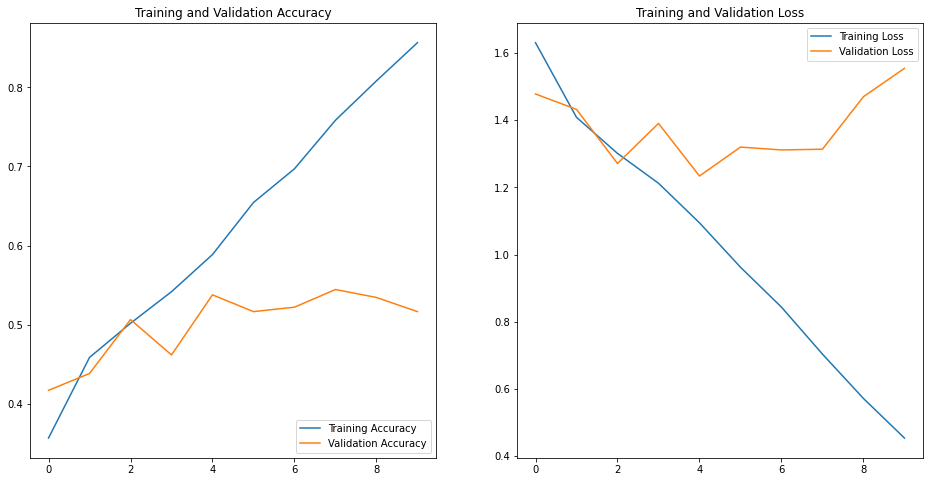

In [9]:
import zipfile
import numpy as np
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Load the zipped dataset
#with zipfile.ZipFile('/content/sample_data/archive.zip', 'r') as zip_ref:
    #zip_ref.extractall()

# Define the parameters
img_width, img_height = 48, 48
train_data_dir = 'images/train'
validation_data_dir = 'images/validation'
nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10
batch_size_t = 16
batch_size_v = 4
num_classes = 7

# Define the model

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(36, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(76, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)#, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_t,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_v,
    color_mode="grayscale",
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size/2,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size/2)

# Save the model
model.save('facial_expression_model3.h5')

# Plot the accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# **MODEL-4.5**

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 230s 255ms/step - loss: 1.7315 - accuracy: 0.3031 - val_loss: 1.6355 - val_accuracy: 0.3694
Epoch 2/10
897/897 [==============================] - 230s 256ms/step - loss: 1.5466 - accuracy: 0.3956 - val_loss: 1.4972 - val_accuracy: 0.4129
Epoch 3/10
897/897 [==============================] - 250s 279ms/step - loss: 1.4557 - accuracy: 0.4374 - val_loss: 1.4585 - val_accuracy: 0.4520
Epoch 4/10
897/897 [==============================] - 224s 250ms/step - loss: 1.3819 - accuracy: 0.4710 - val_loss: 1.4215 - val_accuracy: 0.4565
Epoch 5/10
897/897 [==============================] - 224s 250ms/step - loss: 1.3468 - accuracy: 0.4870 - val_loss: 1.3349 - val_accuracy: 0.5056
Epoch 6/10
897/897 [==============================] - 212s 236ms/step - loss: 1.3046 - accuracy: 0.4970 - val_loss: 1.3113 - val_accuracy: 0.5078
Epoch 7/10
897/897 [===================

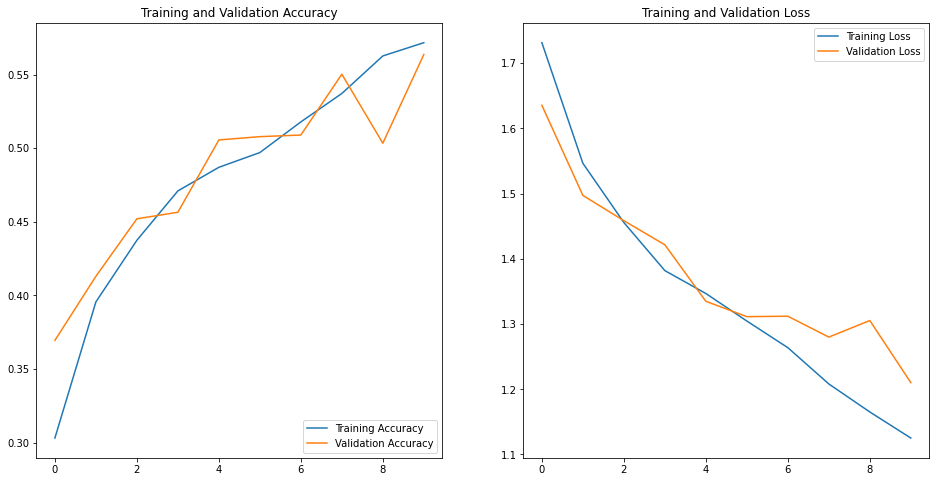

In [13]:
import zipfile
import numpy as np
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# Load the zipped dataset
#with zipfile.ZipFile('/content/sample_data/archive.zip', 'r') as zip_ref:
    #zip_ref.extractall()

# Define the parameters
img_width, img_height = 48, 48
train_data_dir = 'images/train'
validation_data_dir = 'images/validation'
nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10
batch_size_t = 16
batch_size_v = 4
num_classes = 7

# Define the model

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(36, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(76, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)#, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_t,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size_v,
    color_mode="grayscale",
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size/2,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size/2)

# Save the model

model.save('facial_expression_model(4.5).h5')

# Plot the accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
